# The Gender Divide in Data Science: 9 Insights from the 2018 Machine Learning and Data Science Survey"
author: "Martin Barron"
date: "November 29, 2018"


In [1]:
path <- "./2018Survey" #load local copy of dataset


#Set global colors for men and women
cols <- c("Female" = "#FAA75B", "Male" = "#9E67AB")


In [2]:

library(tidyverse) # Data manipulation tools
library(scales) # Simplify percentage formatting of plots
library(grid) # For laying out multiple graphs as one
library(gridExtra) # For laying out multiple graphs as one
library(waffle) # For waffle chart


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [3]:

df <- read_csv(file.path(path,"multipleChoiceResponses.csv"))


Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


In [4]:
str(df)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	23860 obs. of  395 variables:
 $ Time from Start to Finish (seconds): chr  "Duration (in seconds)" "710" "434" "718" ...
 $ Q1                                 : chr  "What is your gender? - Selected Choice" "Female" "Male" "Female" ...
 $ Q1_OTHER_TEXT                      : chr  "What is your gender? - Prefer to self-describe - Text" "-1" "-1" "-1" ...
 $ Q2                                 : chr  "What is your age (# years)?" "45-49" "30-34" "30-34" ...
 $ Q3                                 : chr  "In which country do you currently reside?" "United States of America" "Indonesia" "United States of America" ...
 $ Q4                                 : chr  "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?" "Doctoral degree" "Bachelor’s degree" "Master’s degree" ...
 $ Q5                                 : chr  "Which best describes your undergraduate major? - Selected Ch

In [5]:

# Clean Data --------------------------------------------------------------

#Convert first row metadata into labels
labels <- as.character(df[1,])
df <- df[2:nrow(df),]
for (i in seq_along(labels)) {
  #setattr(dfmc[[i]], name = 'label', value = labels[[i]])
  attr(df[[i]], 'label') <- labels[[i]]
}
rm(labels, i)

df <- df %>%
  rename("Time"= "Time from Start to Finish (seconds)") %>%
  mutate (Time=as.numeric(Time))

# Missing cleaning --------------------------------------------------------

#replace all -1 with NA
df[df==-1] <- NA

#function to detrmine if "choose all that apply" variables are actually NA
allNA <- function(var, outDF, variables){
  numVariables <- length(variables)
  tempDF <- outDF[,variables]
  
  tempDF$temp <- apply(tempDF, 1, function(x) sum(is.na(x)))
  
  outDF[,var] <- ifelse(tempDF$temp==numVariables,NA,TRUE)
  return(outDF)
}

#calculate NAs for special variables
df <- allNA("Q11", df, c('Q11_Part_1','Q11_Part_2','Q11_Part_3','Q11_Part_4','Q11_Part_5','Q11_Part_6','Q11_Part_7'))
df <- allNA("Q12", df, c('Q12_MULTIPLE_CHOICE','Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT','Q12_Part_4_TEXT','Q12_Part_5_TEXT'))
df <- allNA("Q13", df, c('Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5','Q13_Part_6','Q13_Part_7','Q13_Part_8','Q13_Part_9','Q13_Part_10','Q13_Part_11','Q13_Part_12','Q13_Part_13','Q13_Part_14','Q13_Part_15'))
df <- allNA("Q14", df, c('Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7','Q14_Part_8','Q14_Part_9','Q14_Part_10','Q14_Part_11'))
df <- allNA("Q15", df, c('Q15_Part_1','Q15_Part_2','Q15_Part_3','Q15_Part_4','Q15_Part_5','Q15_Part_6','Q15_Part_7'))
df <- allNA("Q16", df, c('Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7','Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_Part_16','Q16_Part_17','Q16_Part_18'))
df <- allNA("Q19", df, c('Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q19_Part_6','Q19_Part_7','Q19_Part_8','Q19_Part_9','Q19_Part_10','Q19_Part_11','Q19_Part_12','Q19_Part_13','Q19_Part_14','Q19_Part_15','Q19_Part_16','Q19_Part_17','Q19_Part_18','Q19_Part_19'))
df <- allNA("Q21", df, c('Q21_Part_1','Q21_Part_2','Q21_Part_3','Q21_Part_4','Q21_Part_5','Q21_Part_6','Q21_Part_7','Q21_Part_8','Q21_Part_9','Q21_Part_10','Q21_Part_11','Q21_Part_12','Q21_Part_13'))
df <- allNA("Q27", df, c('Q27_Part_1','Q27_Part_2','Q27_Part_3','Q27_Part_4','Q27_Part_5','Q27_Part_6','Q27_Part_7','Q27_Part_8','Q27_Part_9','Q27_Part_10','Q27_Part_11','Q27_Part_12','Q27_Part_13','Q27_Part_14','Q27_Part_15','Q27_Part_16','Q27_Part_17','Q27_Part_18','Q27_Part_19','Q27_Part_20'))
df <- allNA("Q28", df, c('Q28_Part_1','Q28_Part_2','Q28_Part_3','Q28_Part_4','Q28_Part_5','Q28_Part_6','Q28_Part_7','Q28_Part_8','Q28_Part_9','Q28_Part_10','Q28_Part_11','Q28_Part_12','Q28_Part_13','Q28_Part_14','Q28_Part_15','Q28_Part_16','Q28_Part_17','Q28_Part_18','Q28_Part_19','Q28_Part_20','Q28_Part_21','Q28_Part_22','Q28_Part_23','Q28_Part_24','Q28_Part_25','Q28_Part_26','Q28_Part_27','Q28_Part_28','Q28_Part_29','Q28_Part_30','Q28_Part_31','Q28_Part_32','Q28_Part_33','Q28_Part_34','Q28_Part_35','Q28_Part_36','Q28_Part_37','Q28_Part_38','Q28_Part_39','Q28_Part_40','Q28_Part_41','Q28_Part_42','Q28_Part_43'))
df <- allNA("Q29", df, c('Q29_Part_1','Q29_Part_2','Q29_Part_3','Q29_Part_4','Q29_Part_5','Q29_Part_6','Q29_Part_7','Q29_Part_8','Q29_Part_9','Q29_Part_10','Q29_Part_11','Q29_Part_12','Q29_Part_13','Q29_Part_14','Q29_Part_15','Q29_Part_16','Q29_Part_17','Q29_Part_18','Q29_Part_19','Q29_Part_20','Q29_Part_21','Q29_Part_22','Q29_Part_23','Q29_Part_24','Q29_Part_25','Q29_Part_26','Q29_Part_27','Q29_Part_28'))
df <- allNA("Q30", df, c('Q30_Part_1','Q30_Part_2','Q30_Part_3','Q30_Part_4','Q30_Part_5','Q30_Part_6','Q30_Part_7','Q30_Part_8','Q30_Part_9','Q30_Part_10','Q30_Part_11','Q30_Part_12','Q30_Part_13','Q30_Part_14','Q30_Part_15','Q30_Part_16','Q30_Part_17','Q30_Part_18','Q30_Part_19','Q30_Part_20','Q30_Part_21','Q30_Part_22','Q30_Part_23','Q30_Part_24','Q30_Part_25'))
df <- allNA("Q31", df, c('Q31_Part_1','Q31_Part_2','Q31_Part_3','Q31_Part_4','Q31_Part_5','Q31_Part_6','Q31_Part_7','Q31_Part_8','Q31_Part_9','Q31_Part_10','Q31_Part_11','Q31_Part_12'))
df <- allNA("Q33", df, c('Q33_Part_1','Q33_Part_2','Q33_Part_3','Q33_Part_4','Q33_Part_5','Q33_Part_6','Q33_Part_7','Q33_Part_8','Q33_Part_9','Q33_Part_10','Q33_Part_11'))
df <- allNA("Q34", df, c('Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6'))
df <- allNA("Q35", df, c('Q35_Part_1','Q35_Part_2','Q35_Part_3','Q35_Part_4','Q35_Part_5','Q35_Part_6'))
df <- allNA("Q36", df, c('Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7','Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12','Q36_Part_13'))
df <- allNA("Q38", df, c('Q38_Part_1','Q38_Part_2','Q38_Part_3','Q38_Part_4','Q38_Part_5','Q38_Part_6','Q38_Part_7','Q38_Part_8','Q38_Part_9','Q38_Part_10','Q38_Part_11','Q38_Part_12','Q38_Part_13','Q38_Part_14','Q38_Part_15','Q38_Part_16','Q38_Part_17','Q38_Part_18','Q38_Part_19','Q38_Part_20','Q38_Part_21','Q38_Part_22'))
df <- allNA("Q39", df, c('Q39_Part_1','Q39_Part_2'))
df <- allNA("Q41", df, c('Q41_Part_1','Q41_Part_2','Q41_Part_3'))
df <- allNA("Q42", df, c('Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5'))
df <- allNA("Q44", df, c('Q44_Part_1','Q44_Part_2','Q44_Part_3','Q44_Part_4','Q44_Part_5','Q44_Part_6'))
df <- allNA("Q45", df, c('Q45_Part_1','Q45_Part_2','Q45_Part_3','Q45_Part_4','Q45_Part_5','Q45_Part_6'))
df <- allNA("Q47", df, c('Q47_Part_1','Q47_Part_2','Q47_Part_3','Q47_Part_4','Q47_Part_5','Q47_Part_6','Q47_Part_7','Q47_Part_8','Q47_Part_9','Q47_Part_10','Q47_Part_11','Q47_Part_12','Q47_Part_13','Q47_Part_14','Q47_Part_15','Q47_Part_16'))
df <- allNA("Q49", df, c('Q49_Part_1','Q49_Part_2','Q49_Part_3','Q49_Part_4','Q49_Part_5','Q49_Part_6','Q49_Part_7','Q49_Part_8','Q49_Part_9','Q49_Part_10','Q49_Part_11','Q49_Part_12'))
df <- allNA("Q50", df,  c('Q50_Part_1','Q50_Part_2','Q50_Part_3','Q50_Part_4','Q50_Part_5','Q50_Part_6','Q50_Part_7','Q50_Part_8'))

# Calculate total NAs for variables
countNAvars <- c('Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9',
                 'Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19',
                 'Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29',
                 'Q30','Q31','Q32','Q33','Q34','Q35','Q36','Q37','Q38','Q39',
                 'Q40','Q41','Q42','Q43','Q44','Q45','Q46','Q47','Q48','Q49',
                 'Q50')

tempDF <- df[,countNAvars]

df$na_count <- apply(tempDF, 1, function(x) sum(is.na(x)))
rm(tempDF, allNA,countNAvars)

# Filter ------------------------------------------------------------------
# Remove cases where most values are missing
dropManyMissing <- filter (df, na_count>=40)

df <- filter (df, na_count<40)

## Time.  What do surveys where it took less than 5 minutes look like
dropToQuick <- filter(df, Time <= 600)

df <- filter(df, Time > 600)

# Limit to self-described Males and Females for this analysis
dropNonbinary <- filter(df, !(Q1 %in% c("Female", "Male")))
df <- filter (df, Q1 %in% c("Female", "Male"))

df$student <- ifelse(df$Q6=="Student" | df$Q7=="I am a student",TRUE,FALSE)
# dropStudent <- filter(df, student==TRUE)

rm(dropManyMissing, dropNonbinary, dropToQuick)

# Convert variables to factors --------------------------------------------
df <- df %>%
  mutate_at(vars(Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q12_MULTIPLE_CHOICE,Q24,Q25,Q26,
                 Q13_Part_1, Q13_Part_2, Q13_Part_3, Q13_Part_4, Q13_Part_5, Q13_Part_6, 
                 Q13_Part_7, Q13_Part_8, Q13_Part_9, Q13_Part_10, Q13_Part_11,
                 Q13_Part_12, Q13_Part_13, Q13_Part_14, Q13_Part_15, Q13_OTHER_TEXT,
                 Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,
                 Q18,Q40,Q44,Q48, Q49_Part_1,Q49_Part_2,Q49_Part_3, Q49_Part_4, 
                 Q49_Part_5, Q49_Part_6, Q49_Part_7,Q49_Part_8, Q49_Part_9,Q49_Part_10, 
                 Q49_Part_11, Q49_Part_12, Q11_Part_1,Q11_Part_2, Q11_Part_3,Q11_Part_4, 
                 Q11_Part_5, Q11_Part_6,Q11_Part_7,Q23),
            as.factor)


# Collapse variables ------------------------------------------------------

# Education
df$Q4 <- fct_recode(df$Q4,  
                    "Bachelor's" = "Bachelor’s degree",
                    "Ph.D." = "Doctoral degree",
                    "Master's" = "Master’s degree",
                    "High School" = "No formal education past high school",
                    "Professional" = "Professional degree",
                    "Some college" = "Some college/university study without earning a bachelor’s degree",
                    NULL = "I prefer not to answer",
)

df$Q4 <-  fct_relevel(df$Q4,
                      "High School",
                      "Some college",
                      "Bachelor's",
                      "Master's",
                      "Professional",
                      "Ph.D.")

# Job Title
df$Q6r <- fct_lump(df$Q6, n=10)

#Years of Experience
df$Q8r <- fct_collapse(df$Q8,
                       "<1 year" = c("0-1"),
                       "1-3 years" = c("1-2","2-3"),
                       "3-5 years" = c("2-3", "3-4","4-5"),
                       "5-10 years" = c("5-10"),
                       "10+ years" = c("10-15", "15-20","20-25","25-30","30 +")
)
df$Q8r <- fct_relevel(df$Q8r,c("<1 year","1-3 years","3-5 years","5-10 years","10+ years"))

# Salary
df$Q9 <- fct_recode(df$Q9,  
                    NULL = "I do not wish to disclose my approximate yearly compensation")

df$Q9r<- fct_collapse(df$Q9,
                      "0 - 20k" = c("0-10,000", "10-20,000"),
                      "20-40k" = c("10-20,000", "20-30,000", "30-40,000"),
                      "40-70k" = c("40-50,000","50-60,000","60-70,000"),
                      "70-100k" = c("70-80,000", "80-90,000", "90-100,000"),
                      "100-150k" = c("100-125,000","125-150,000"),
                      "150-200k" = c("150-200,000"),
                      "200k+" = c("200-250,000","250-300,000","300-400,000", "400-500,000","500,000+")
)

df$Q9 <- fct_relevel(df$Q9,
                     "0-10,000",                                                   
                     "10-20,000",
                     "20-30,000",
                     "30-40,000", 
                     "40-50,000", 
                     "50-60,000",
                     "60-70,000",                                                   
                     "70-80,000",                                                   
                     "80-90,000",                                                   
                     "90-100,000", 
                     "100-125,000",                                                 
                     "125-150,000",                                                 
                     "150-200,000",                                                 
                     "200-250,000",                                                 
                     "250-300,000",                                                 
                     "300-400,000",                                                 
                     "400-500,000",                                                 
                     "500,000+"
)

df <- mutate(df,Q9_continuous = case_when(
  Q9=="0-10,000"~5000,                                                   
  Q9=="10-20,000"~15000,
  Q9=="20-30,000"~25000,
  Q9=="30-40,000"~35000,
  Q9=="40-50,000"~45000, 
  Q9=="50-60,000"~55000,
  Q9=="60-70,000"~65000,                                                   
  Q9=="70-80,000"~75000,                                                   
  Q9=="80-90,000"~85000,                                                   
  Q9=="90-100,000"~95000, 
  Q9=="100-125,000"~112500,                                                 
  Q9=="125-150,000"~137500,                                                 
  Q9=="150-200,000"~175000,                                                 
  Q9=="200-250,000"~225000,                                                 
  Q9=="250-300,000"~275000,                                                 
  Q9=="300-400,000"~350000,                                                 
  Q9=="400-500,000"~450000,                                                 
  Q9=="500,000+"~500000))

df$Q12r <- fct_recode(df$Q12_MULTIPLE_CHOICE,  
                      "Stats Software" = "Advanced statistical software (SPSS, SAS, etc.)",
                      "Spreadsheets" = "Basic statistical software (Microsoft Excel, Google Sheets, etc.)",
                      "B.I. sofware"= "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",
                      "Cloud software" = "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",
                      "IDE" = "Local or hosted development environments (RStudio, JupyterLab, etc.)"
)

df$Q17r <- fct_lump(df$Q17, n=5)

df <- mutate(df,Q23_continuous = case_when(
  Q23=="0% of my time"~0,                                                   
  Q23=="1% to 25% of my time"~.13,
  Q23=="25% to 49% of my time"~.37,
  Q23=="50% to 74% of my time"~.62,
  Q23=="75% to 99% of my time"~.87, 
  Q23=="100% of my time"~1))

#Years of coding experience
df$Q24r <- fct_collapse(df$Q24,
                        "<1 year" = c("< 1 year", "I have never written code and I do not want to learn","I have never written code but I want to learn"),
                        "1-3 years" = c("1-2 years"),
                        "3-5 years" = c("3-5 years"),
                        "5-10 years" = c("5-10 years"),
                        "10+ years" = c("10-20 years", "20-30 years", "30-40 years", "40+ years")
)

df$Q24r <- fct_relevel(df$Q24r,c("<1 year","1-3 years","3-5 years","5-10 years","10+ years"))

# Years of ML learning
df$Q25r <- fct_collapse(df$Q25,
                        "<1 year" = c("< 1 year", "I have never studied machine learning but plan to learn in the future","I have never studied machine learning and I do not plan to"),
                        "1-3 years" = c("1-2 years","2-3 years"),
                        "3-5 years" = c( "3-4 years", "4-5 years"),
                        "5-10 years" = c("5-10 years"),
                        "10+ years" = c("10-15 years", "20+ years")
)

df$Q25r <- fct_relevel(df$Q25r,c("<1 year","1-3 years","3-5 years","5-10 years","10+ years"))

# Consider self data scientist
df$Q26r <- fct_relevel(df$Q26,c( "Definitely not", "Probably not","Maybe","Probably yes","Definitely yes"))     
#we rename levels for easier sorting later
levels(df$Q26r) <- c("1-Definitely not", "2-Probably not","3-Maybe","4-Probably yes","5-Definitely yes")  


In [6]:

createDotPlot <- function(df, var, ylabel, sort=F, reverse=F, labCutoff=0, hideYAxis=F) {
  
  # Reverse variable factors if requested
  if (reverse){
    df["var"] =fct_rev(df[[var]])
  } else{
    df["var"]=df[[var]]
  }
  df <- df %>%
    drop_na(var)
  
  dat <- df %>%
    group_by(Q1, var) %>%
    summarize(freq = n()) %>%
    mutate(per = freq / sum(freq))
  
  right_label <- dat %>%
    group_by(var) %>%
    arrange(desc(per)) %>%
    top_n(1, per)
  
  
  left_label <- dat %>%
    group_by(var) %>%
    arrange(desc(per)) %>%
    slice(2)
  
  delta <- dat %>%
    select(-freq) %>%
    spread(Q1, per) %>%
    mutate(delt=abs(Male-Female),
           labLocation=((Male+Female)/2))# %>%
  # select(-Female, -Male) 
  if (sort){
    dat <- left_join(dat, delta, by="var")
    dat$var <- fct_reorder(dat$var, dat$labLocation)
  }
  delta <- delta %>%
    filter (delt>=labCutoff) %>%
    mutate (lab=percent(delt, accuracy = .1 ))
  #print(delta)
  
  if(hideYAxis){
    ggplot(dat, aes(per, var)) +
      geom_line(aes(group = var), color="#BBBBBB", size=1) +
      geom_point(aes(color = Q1), size=4) +
      # Add delta labels
      geom_text(data=delta, aes(x=labLocation, y=var, label=lab), size=3,nudge_y = .4) +
      # Broaden scale slightly 
      #scale_x_continuous(labels = scales::percent) +
      # Adjust colors
      scale_colour_manual(values = cols)+
      # Set lables
      ylab(ylabel) +
      # Set theme and adjust
      theme_minimal()+ 
      theme(legend.position = "bottom")+
      theme(legend.title=element_blank()) +
      theme(axis.title.x=element_blank()) +
      theme(panel.grid.major.x = element_blank())+
      theme(panel.grid.minor.x = element_blank())+
      theme(
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())
    
  } else {
    
    
    ggplot(dat, aes(per, var)) +
      geom_line(aes(group = var), color="#BBBBBB", size=1) +
      geom_point(aes(color = Q1), size=4) +
      # Add delta labels
      geom_text(data=delta, aes(x=labLocation, y=var, label=lab), size=3,nudge_y = .4) +
      # Broaden scale slightly 
      #scale_x_continuous(labels = scales::percent) +
      # Adjust colors
      scale_colour_manual(values = cols)+
      # Set lables
      ylab(ylabel) +
      # Set theme and adjust
      theme_minimal()+ 
      theme(legend.title=element_blank()) +
      theme(axis.title.x=element_blank()) +
      theme(panel.grid.major.x = element_blank())+
      theme(panel.grid.minor.x = element_blank())
  }
}


In [7]:

createMultiPercentDotPlot <- function(df, vars, var,varLabels, ylabel, sort=T, labCutoff=0, lumpValues=NULL) {
  
  #reduce dataset to variables of interest
  dat <- df[,vars]
  #convert back to character
  dat <- as.data.frame(lapply(dat, as.numeric), stringsAsFactors = F)
  
  #revise names
  names(dat) <-varLabels
  
  #summarize number non missing and calculate percent based on number of non missing cases
  #add gender 
  dat$Q1 <- as.character(df$Q1)
  
  
  dat <- dat%>%
    group_by(Q1) %>%
    summarise_all(funs(mean(., na.rm=T)/100))
  
  dat <- gather(dat, "var","per",-Q1)
  
  delta <- dat %>%
    spread(Q1, per) %>%
    mutate(delt=abs(Male-Female),
           labLocation=((Male+Female)/2))# %>%
  # select(-Female, -Male) 
  if (sort){
    dat <- left_join(dat, delta, by="var")
    dat$var <- fct_reorder(dat$var, dat$labLocation)
  }
  
  delta <- delta %>%
    filter (delt>=labCutoff) %>%
    mutate (lab=percent(delt, accuracy = .1))
  
  ggplot(dat, aes(y=var, x=per)) +
    geom_line(aes(group = var), color="#BBBBBB", size=1)+
    geom_point(aes(color = Q1), size=4) +
    geom_text(data=delta, aes(x=labLocation, y=var, label=lab), size=3,nudge_y = .4) +
    # Broaden scale slightly 
    #scale_x_continuous(labels = scales::percent) +
    # Adjust colors
    scale_colour_manual(values = cols)+
    # Set lables
    ylab(ylabel) +
    # Set theme and adjust
    theme_minimal()+ 
    theme(legend.title=element_blank()) +
    theme(legend.position = "bottom")+
    theme(axis.title.x=element_blank()) +
    theme(panel.grid.major.x = element_blank())+
    theme(panel.grid.minor.x = element_blank())
  
}


In [8]:


createMultiDotPlot <- function(df, vars, var, ylabel, sort=F, labCutoff=0, 
                               lumpValues=NULL) {
  
  #reduce dataset to variables of interest
  dat <- df[,vars]
  #convert back to character
  dat <- as.data.frame(lapply(dat, as.character), stringsAsFactors = F)
  #initialize character vector to hold new names
  newNames <- character()
  #loop through all variables and extract unique value
  
  for (i in 1:length(dat)){
    v <- dat[,i]
    v <- v[!is.na(v)]
    varName <- unique(v)
    newNames <- c(newNames, varName)
  }
  #set new names
  names(dat) <- newNames
  #group vars into other if requested if request
  if (!is.null(lumpValues)){
    #create a subset
    groupDat <- dat[,lumpValues]
    groupDat$temp <- apply(groupDat, 1, function(x) ifelse(sum(is.na(x))==length(groupDat),NA,TRUE))
    dat <- dat[,!(names(dat) %in% lumpValues)]
    dat$Other <- groupDat$temp
  }
  
  #add gender 
  dat$Q1 <- as.character(df$Q1)
  dat[,"var"] <- df[,var]
  
  #summarize number non missing and calculate percent based on number of non missing cases
  dat <- dat%>%
    group_by(Q1) %>%
    summarise_all(funs(sum(!is.na(.))))
  
  dat <- mutate_if(dat,is.numeric , funs(./var)) %>%
    select(-var)
  
  dat <- gather(dat, "var","per",-Q1)
  
  delta <- dat %>%
    spread(Q1, per) %>%
    mutate(delt=abs(Male-Female),
           labLocation=((Male+Female)/2))# %>%
  # select(-Female, -Male) 
  if (sort){
    dat <- left_join(dat, delta, by="var")
    dat$var <- fct_reorder(dat$var, dat$labLocation)
  }
  
  delta <- delta %>%
    filter (delt>=labCutoff) %>%
    mutate (lab=percent(delt, accuracy = .1))
  
  
  ggplot(dat, aes(y=var, x=per)) +
    geom_line(aes(group = var), color="#BBBBBB", size=1)+
    geom_point(aes(color = Q1), size=4) +
    geom_text(data=delta, aes(x=labLocation, y=var, label=lab), size=3,nudge_y = .4) +
    # Broaden scale slightly 
    #scale_x_continuous(labels = scales::percent) +
    # Adjust colors
    scale_colour_manual(values = cols)+
    # Set lables
    ylab(ylabel) +
    # Set theme and adjust
    theme_minimal()+ 
    theme(legend.title=element_blank()) +
    theme(axis.title.x=element_blank()) +
    theme(panel.grid.major.x = element_blank())+
    theme(panel.grid.minor.x = element_blank())
  
}


In [9]:

# Special version of grid arrange that shares the legend across all plots
# Adapted from https://github.com/tidyverse/ggplot2/wiki/Share-a-legend-between-two-ggplot2-graphs
grid_arrange_shared_legend <-
  function(...,
           ncol = length(list(...)),
           nrow = 1,
           position = c("bottom", "right")) {
    
    plots <- list(...)
    position <- match.arg(position)
    g <-
      ggplotGrob(plots[[1]] + theme(legend.position = position))$grobs
    legend <- g[[which(sapply(g, function(x)
      x$name) == "guide-box")]]
    lheight <- sum(legend$height)
    lwidth <- sum(legend$width)
    gl <- lapply(plots, function(x)
      x + theme(legend.position = "none"))
    gl <- c(gl, ncol = ncol, nrow = nrow)
    
    combined <- switch(
      position,
      "bottom" = arrangeGrob(
        do.call(arrangeGrob, gl),
        legend,
        ncol = 1,
        heights = unit.c(unit(1, "npc") - lheight, lheight)
      ),
      "right" = arrangeGrob(
        do.call(arrangeGrob, gl),
        legend,
        ncol = 2,
        widths = unit.c(unit(1, "npc") - lwidth, lwidth)
      )
    )
    
    grid.newpage()
    grid.draw(combined)
    
    # return gtable invisibly
    invisible(combined)
    
  }



# Introduction
There is a scarcity of available information on the representation and experience of women in Data Science. What we can say with certainty is that computer and mathematical occupations---such as, of course, Data Science and Machine Learning---have seen a precipitous decline in the female representation over the past three decades (Figure 1). We also know that women across all STEM fields experience a startling level of discrimination[^pew].  

But we need not accept this for our young discipline.  We are not inheriting decades of ingrained patterns--we are defining those patterns now for ourselves and all those who come after us. 

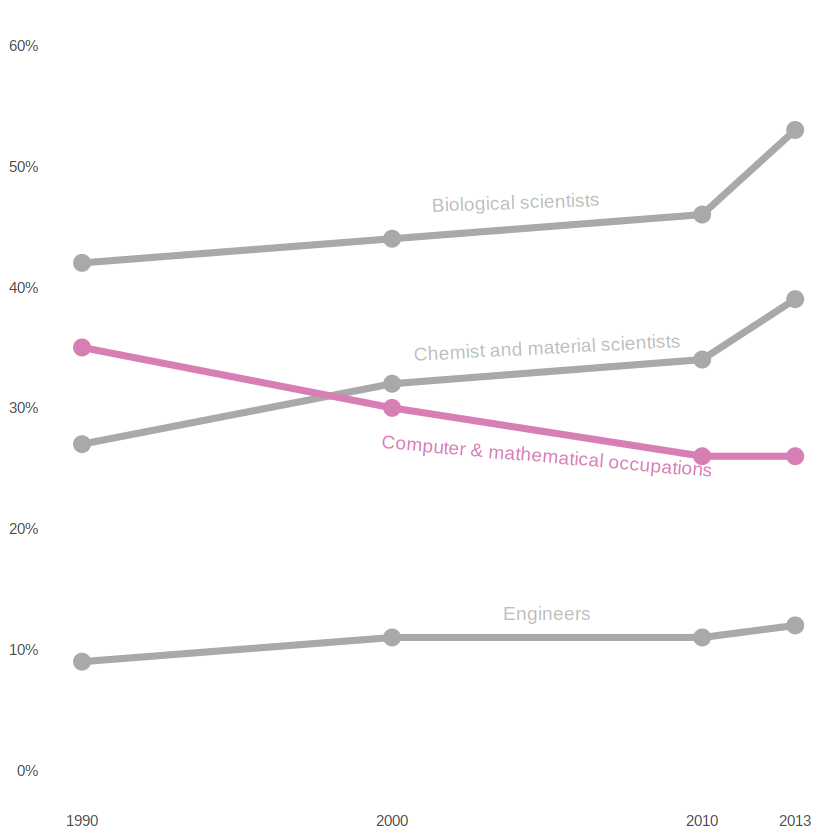

In [10]:

#Replicating AAUW diagram
dat <- data.frame(Occupation=c("Biological","Chemist and material scientists", "Computer and mathematical", "Engineers"),
                  "1990"=c(.42,.27,.35,.09),
                  "2000"=c(.44,.32,.30,.11),
                  "2010"=c(.46,.34,.26,.11),
                  "2013"=c(.53,.39,.26,.12)
)
dat <-gather(dat,"year", "value", -Occupation)
dat$year <- gsub("X", "", dat$year)
dat$year <-as.numeric(dat$year)

ggplot(data=dat, aes(x=year,y=value, group=Occupation))+
  geom_line(aes(color=Occupation),size=1.5)+
  geom_point(aes(color=Occupation),size=4)+
  scale_x_continuous(breaks=c(1990,2000,2010,2013))+
  scale_y_continuous(breaks=seq(0,.60,by=.10),limits=c(0,.60),labels = percent_format(accuracy = 1))+
  scale_color_manual(values=c("darkgray","darkgray","#d77fb4","darkgray"))+
  annotate(geom = "text", x = 2004, y = .47, label = "Biological scientists", color = "gray", angle = 2)+
  annotate(geom = "text", x = 2005, y = .35, label = "Chemist and material scientists", color = "gray", angle = 3)+
  annotate(geom = "text", x = 2005, y = .13, label = "Engineers", color = "gray", angle = 0)+
  annotate(geom = "text", x = 2005, y = .26, label = "Computer & mathematical occupations", color = "#d77fb4", angle = -5)+
  theme_minimal()+
  theme(legend.position =  "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank())



<center><small>Figure 1: Women in selected STEM occupations, 1990-2013[^aauw]</center></small>

But in order to establish equitable patterns, those who are on the frontlines of promoting gender equality in our field need vital information. Kaggle's 2018 Machine Learning and Data Science Survey (from here on referred to as ML&DS Survey) provides such information. Although the survey was not explicitly designed to explore gender issues, the breadth of information collected allows us to at least begin to explore the participation and experience of women in our field[^nonprob].

In this research note, we examine the responses from 2,696 female and 14,078 male respondents[^cleaning] to the 2018 ML&DS Survey[^methodology]. We organize our examination of the more than 400 survey variables collected into the 9 insights presented below.

# 1) Women were highly underrepresented in the ML&DS Survey.

Of the 16,774 survey participants, only 16.0% of respondents in the final dataset were women. As this is a non-probability sample, we cannot infer that only 16% of the data science community is female. Still, the lack of participation on the part of women is cause for great concern. 

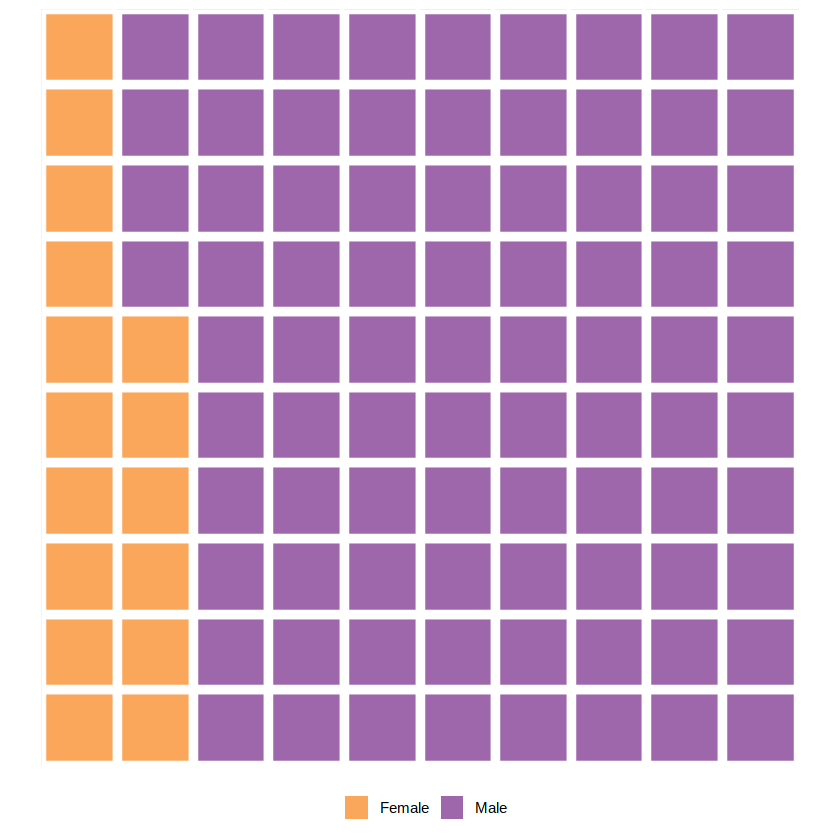

In [11]:

#Calculate percents of Men and Women for Waffle chart
dat <- df %>%
  group_by(Q1) %>%
  summarize(n=n()) %>%
  mutate( vals= (n/sum(n))*100) %>%
  rename(names=Q1) %>%
  select(-n)

# Waffle needs a named vector
parts <- round(dat$vals)
names(parts) <-dat$names

waffle(parts, rows=10, colors=cols)+ #,use_glyph = "user", glyph_size =8)+
  theme(legend.position="bottom") 


<center><small>Figure 2: Gender differences in survey participation</center></small>

# 2) Women respondents were younger and earlier in their careers.

The vast majority of respondents were between 22 and 44 years old (Figure 3)[^dotplot]. Women respondents tended to be younger than men. Comparatively, women were overrepresented in the 22-29 age group, while men were overrepresented in all other age groups.


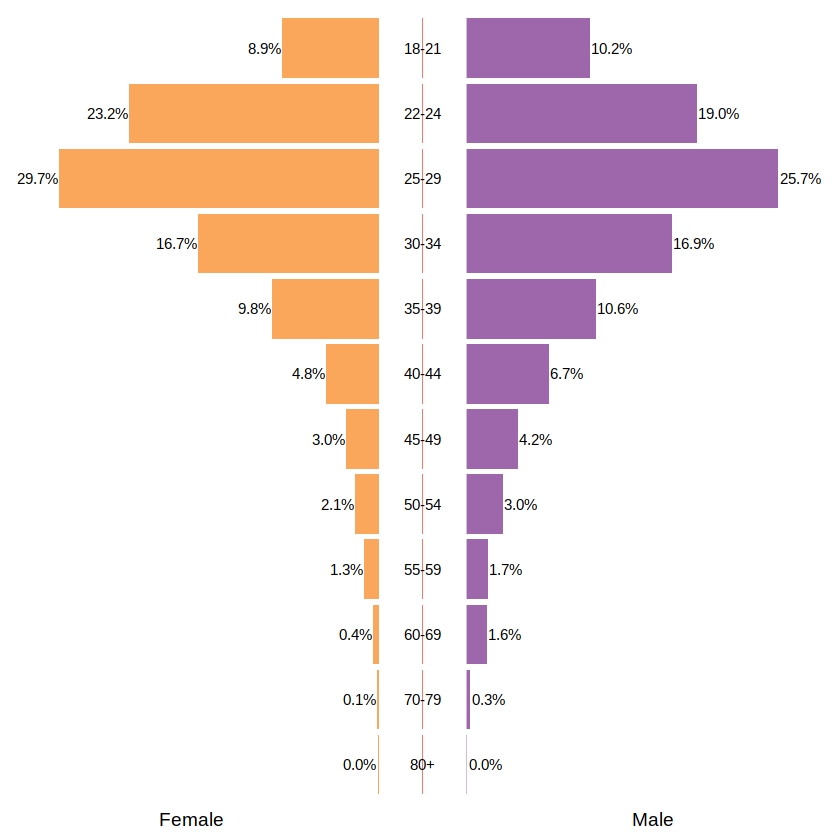

In [12]:

# Construct a pyramid age chart

# Reverse levels on Age variable so youngest display at top of pyramid
df$Q2r <- fct_rev(df$Q2)

# Split and summarize age by gender
male <- df %>%
  filter(Q1=="Male") %>%
  group_by(Q2r) %>%
  summarize(n=n()) %>%
  mutate(percent=n/sum(n))

female <- df %>%
  filter(Q1=="Female") %>%
  group_by(Q2r) %>%
  summarize(n=n()) %>%
  complete(Q2r, fill=list(n=0)) %>%
  mutate(percent=n/sum(n))

# Make separate male, female, and label graphs and then combine

# Male bars
gg.male <- ggplot(data=male)+
  geom_bar(aes(x=Q2r,y = percent),fill=cols["Male"], stat="identity")+
  geom_text( aes(x=Q2r,y = percent+.0015,  label = scales::percent(percent)), hjust=0,size = 3) +
  scale_y_continuous(expand = expand_scale(add=c(0,.05)))+ 
  coord_flip() +
  theme_minimal()+
  theme_minimal()+
  ylab("Male")+
  theme(legend.position = 'none',
        axis.text.x = element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.grid.major = element_blank(),
        plot.margin=unit(c(5.5,0,5.5,0),"points"),
        panel.grid.minor = element_blank())

# Female bars
gg.female <- ggplot(data=female)+
  geom_bar(aes(x=Q2r,y = -percent), fill = cols["Female"], stat="identity")+
  geom_text( aes(x=Q2r,y = -percent - .0015,  label = scales::percent(percent)), hjust=1,size = 3) +
  scale_y_continuous(expand = expand_scale(add=c(.05,0)))+ 
  coord_flip() +
  theme_minimal()+
  ylab("Female")+
  theme(legend.position = 'none',
        axis.text.x = element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.grid.major = element_blank(),
        plot.margin=unit(c(5.5,0,5.5,0),"points"),
        panel.grid.minor = element_blank())

# Age labels
gg.ages <- ggplot(data=male)+
  geom_bar(  aes(x=Q2r, y = 0, fill = alpha('white',0)),stat="identity") +
  geom_text( aes(x=Q2r,y = 0,  label = as.character(Q2r)), size = 3,) +
  coord_flip() +
  theme_minimal()+
  ylab("")+
  theme(legend.position = 'none' ,
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.title.y = element_blank(),
        axis.ticks = element_blank(),
        panel.grid.major = element_blank(),
        plot.margin=unit(c(5.5,0,5.5,0),"points"),
        panel.grid.minor = element_blank())

# Combine all three in new plt
grid.newpage()
pushViewport( viewport( layout = grid.layout(1,3, widths = c(.45,.1,.45))))
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)

print(gg.female, vp = vplayout(1,1))
print(gg.ages,   vp = vplayout(1,2))
print(gg.male,   vp = vplayout(1,3))



<center><small>Figure 3: Gender differences in age</center></small>

Unsurprisingly given their relative youth, women respondents tended to have less experience than their male counterparts. Women were more likely to have less than 1 year of both coding and machine learning experience than men.

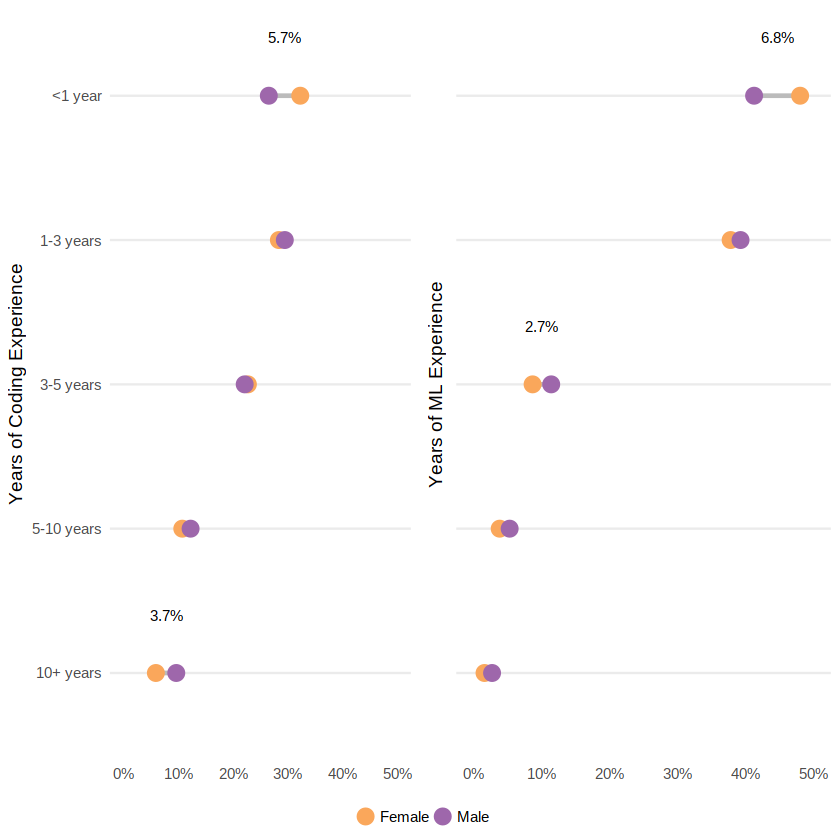

In [13]:

# Use previously defined function to create dot plots
p4 <- createDotPlot(df, "Q25r", ylabel="Years of ML Experience", reverse = T, labCutoff = .02, hideYAxis=T)+
  scale_x_continuous(labels = scales::percent_format(accuracy = 1), limits=c(0,.5),breaks=seq(0,.5,by=.1)) 

p5 <- createDotPlot(df, "Q24r", ylabel="Years of Coding Experience", reverse = T, labCutoff = .02,hideYAxis=F)+
  scale_x_continuous(labels = scales::percent_format(accuracy = 1), limits=c(0,.5),breaks=seq(0,.5,by=.1)) 
# Combine graphs into single object
grid_arrange_shared_legend(p5,p4)

<center><small>Figure 4: Gender differences in experience</small></center>

# 3) Women respondents were better educated than their male counterparts.

Despite the relative youth of women respondents, women surveyed had generally higher educations than men. More than 50% of female respondents had master's degrees (or expected to receive one within 2 years). Women also were more likely to have earned a PhD.


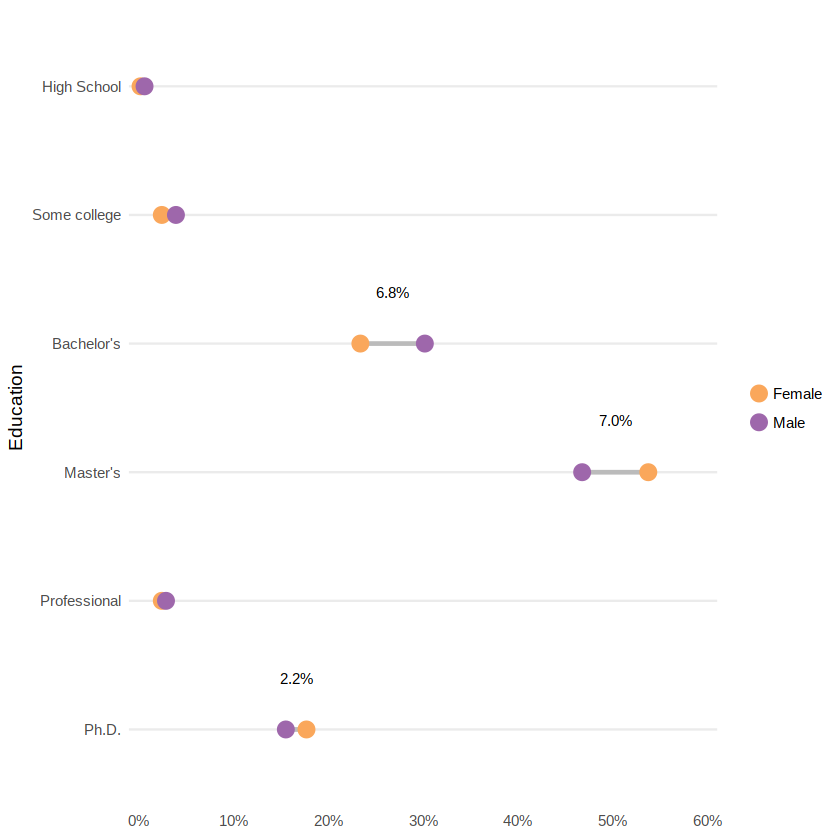

In [14]:

createDotPlot(df, "Q4", ylabel="Education",reverse=T, labCutoff = .02)+
  scale_x_continuous(labels = scales::percent_format(accuracy = 1), limits=c(0,.6),breaks=seq(0,.6,by=.1),expand = c(0, .01)) 


<center><small>Figure 5: Gender differences in education level</center></small>

# 4) Women and men do similar activities at work.

Women and men spend roughly equivalent proportions of their time on different work activities. Both spend a plurality of their time cleaning and modeling data, with gathering data, visualizing data, and finding insights from data taking smaller proportions of their time, respectively. Model production was a very small part of the jobs of men and women.

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session.”

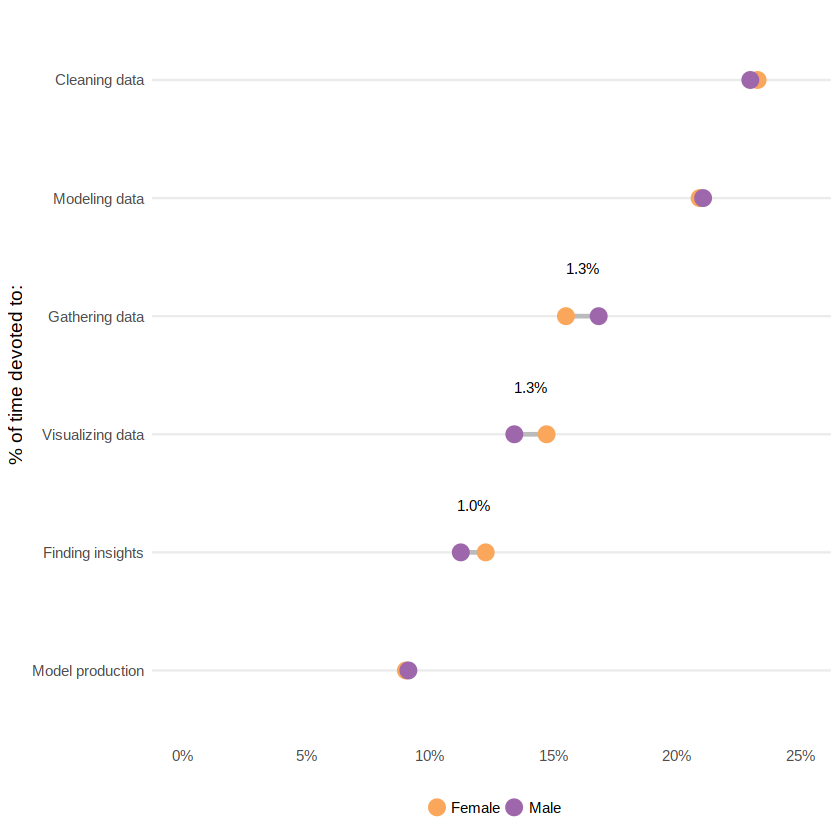

In [15]:

#These variables store percentage values.  We use a predefined function to plot them
vars <- c('Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6')
varLabels = c("Gathering data", "Cleaning data", "Visualizing data", "Modeling data", "Model production", "Finding insights")

createMultiPercentDotPlot(df, vars, "Q34", varLabels, ylabel="% of time devoted to:",labCutoff = .01)+
  scale_x_continuous(labels = scales::percent_format(accuracy = 1), limits=c(0,.25),breaks=seq(0,.25,by=.05)) 


<center><small>Figure 6: How time is spent during a data science project</center></small>

# 5) Women and men spend about equal time coding.

Perhaps unsurprisingly given the similarity in how men and women respondents spend their time, both spend about half their time actively coding. 

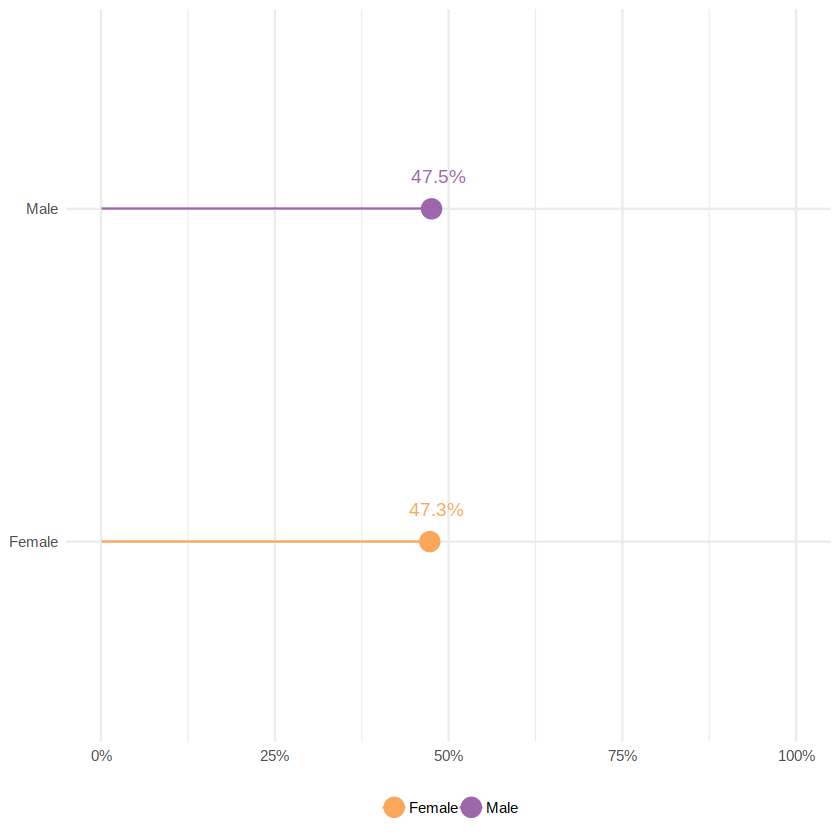

In [16]:

dat <- df %>%
  group_by(Q1) %>%
  summarize(Q23_continuous=mean(Q23_continuous, na.rm=T))

ggplot(data=dat, aes(x=Q1, y=Q23_continuous, fill=Q1, color=Q1))+
  geom_point(stat="identity",size=5)+
  geom_segment(aes(xend=Q1, yend=0))+
  geom_text(aes(y=Q23_continuous+.01, label=scales::percent(Q23_continuous,accuracy =.1)), vjust=-2) +theme_minimal()+
  coord_flip() +
  theme_minimal()+
  theme(axis.title.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  theme(legend.position = "bottom")+
  scale_color_manual(values=cols)+
  scale_y_continuous(labels = scales::percent, limits = c(0,1))


<center><small>Figure 7: Time spent actively coding</center></small>

# 6) Men and women use similar tools.

While men were somewhat more likely, roughly half of men and women develop in an IDE. About 20% of respondents develop in a spreadsheet, whereas the remainder primarily analyze data using some other primary tool.

Both men and women are most likely to consider Python their primary language, followed by R and SQL, respectively. Although this order is the same for both genders, women were more likely to claim R and SQL as their primary programming languages. 

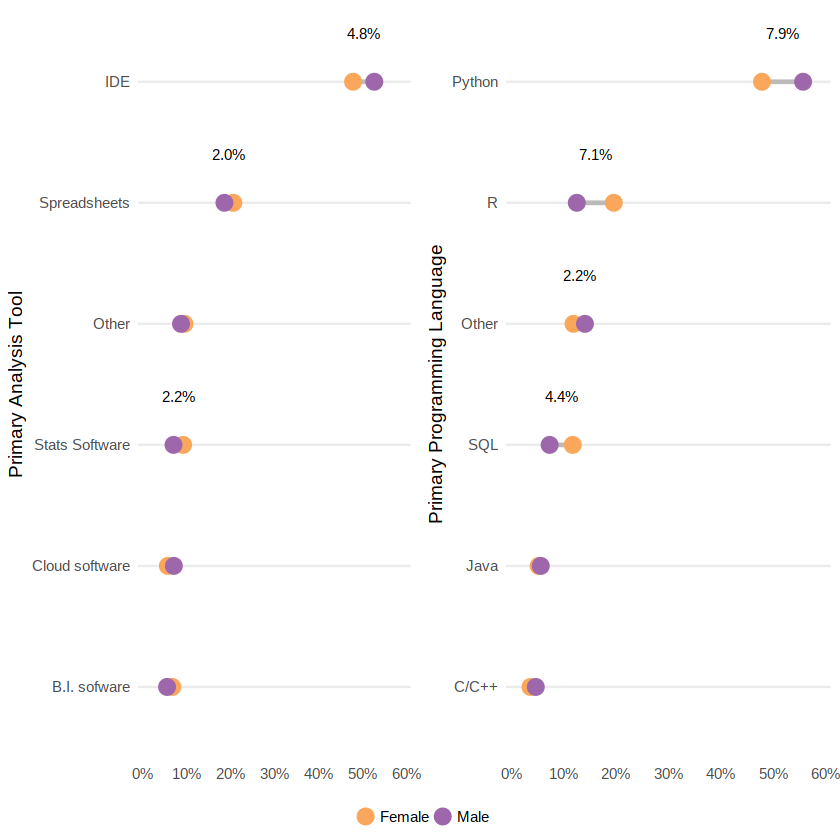

In [17]:
p1 <- createDotPlot(df, "Q12r", ylabel="Primary Analysis Tool",sort=T, labCutoff = .02)+
  scale_x_continuous(labels = scales::percent_format(accuracy = 1), limits=c(0,.6),breaks=seq(0,.6,by=.1),expand = c(0, .01)) 

p2 <- createDotPlot(df, "Q17r", ylabel="Primary Programming Language",sort=T, labCutoff = .02)+
  scale_x_continuous(labels = scales::percent_format(accuracy = 1), limits=c(0,.6),breaks=seq(0,.6,by=.1),expand = c(0, .01)) 

grid_arrange_shared_legend(p1,p2)

<center><small>Figure 8: Gender differences in analysis tools and programming languages</center></small>

# 7) Women and men have different job titles.

Despite the similarity in tasks, coding time, and tools used, men and women hold a variety of job titles, and some interesting differences in those titles can be seen. In particular, men were more likely to be considered “Software Engineers,” whereas women were likely to be "Data Analysts." While the prestige assigned to job titles can vary widely from company to company, "data analyst" are generally considered a less prestigious and more junior positions than many of the other title provided by respondents.

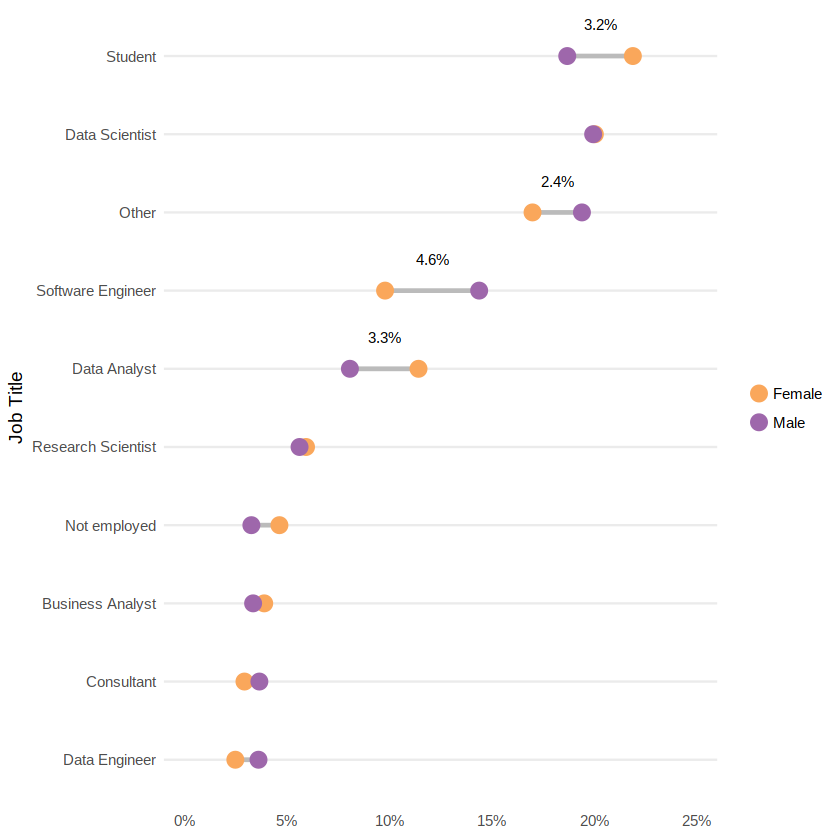

In [18]:

createDotPlot(df, "Q6r", ylabel="Job Title",sort=T, labCutoff = .02)+
  scale_x_continuous(labels = scales::percent_format(accuracy = 1), limits=c(0,.25),breaks=seq(0,.25,by=.05),expand = c(0, .01)) 


<center><small>Figure 9: Gender differences in job titles</center></small>

# 8) Women and men are equally as likely to consider themselves data scientists.

Regardless of title, however, both genders, are equally likely to consider themselves data scientists. Roughly 53% of respondents considered themselves data scientists, whereas only 24% did not consider themselves data scientists.

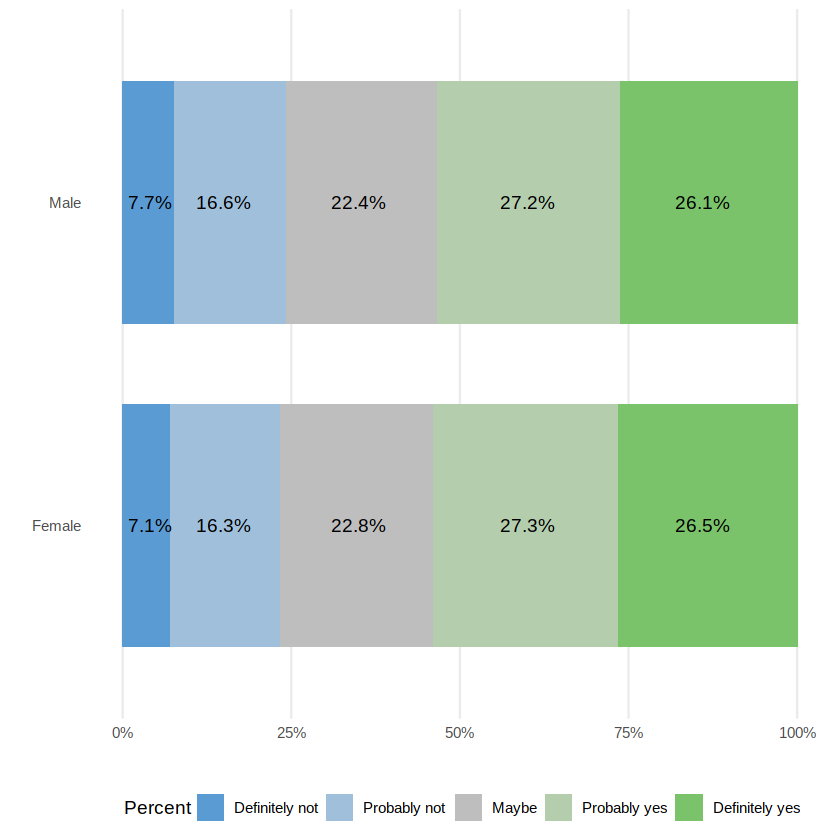

In [19]:

#summarize values by gender
dfQ26 <- df %>%
  filter(!is.na(Q1) & !is.na(Q26r)) %>%
  group_by(Q1) %>%
  count(Q26r) %>%
  mutate(Q26r=as.character(Q26r),
         per=n/sum(n)) %>%
  arrange(Q1, Q26r)
dfQ26$loc <- c(.04,.15,.35,.60,.86)

# I couldn't find a color scheme I liked
#col <- c("#54e1d8", "#58cdeb","#5a9bd4","#5880eb","#5455e1")
#col <- c("#97597f", "#e487bf", "#d77fb4", "#bd709f", "#573449")
#col <- c("#dec5d4", "#d77fb4", "gray", "#a46189", "#573449")
#col <- c("#9FBFDB", "#5A9BD4", "gray", "#CE7058", "#4E3D39")
#col <- c("#9FBFDB", "#5A9BD4", "gray", "#7AC36A", "#B3CDAD")
col <- c("#5A9BD4","#9FBFDB",  "gray", "#B3CDAD", "#7AC36A")

dfQ26$col <-col
mylevels <-c( "Definitely not", "Probably not","Maybe","Probably yes","Definitely yes")

#create plot
ggplot() + 
  geom_bar(data=dfQ26, aes(x=Q1, y=per, fill=col, group=Q1), position="stack", stat="identity", width=.75) +
  #geom_text(data=dfQ26, aes(x=1.5, y=loc, label=Q26r, group=Q1), angle=90)+
  geom_text(data=dfQ26, aes(x=Q1, y=loc, label=percent(per), group=Q1))+
  coord_flip() +
  labs(y="",x="") +
  scale_y_continuous(labels=scales::percent) +
  scale_fill_identity("Percent", labels = mylevels,breaks=col, guide="legend") +
  #scale_fill_brewer(type="seq", labels=mylevels)+
  theme_minimal()+
  theme(legend.position = "bottom") +
  #theme(panel.grid.major.x = element_blank())+
  theme(panel.grid.minor.x = element_blank())+
  theme(panel.grid.major.y = element_blank())



<center><small>Figure 10: Gender Differences in considering self data scientist</center></small>

# 9) Women in the DS&ML survey earn less than men.

Finally, men reported salaries approximately $7,000 higher than women. Although this difference is mitigated, somewhat, when you control for age and experience, it does not disappear.


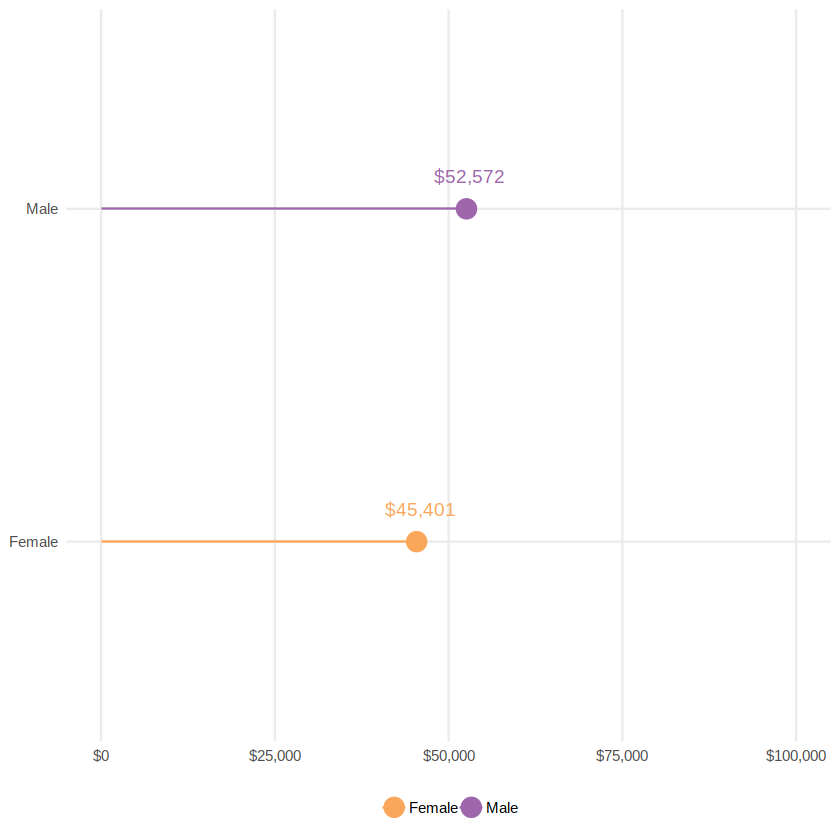

In [20]:

#Summarize salary to means
dat <- df %>%
  group_by(Q1) %>%
  summarize(Q9_continuous=mean(Q9_continuous, na.rm=T))

#Create a lolipop chart
ggplot(data=dat, aes(x=Q1, y=Q9_continuous, fill=Q1, color=Q1))+
  geom_point(stat="identity",size=5)+
  geom_segment(aes(xend=Q1, yend=0))+
  geom_text(aes(y=Q9_continuous+500, label=dollar(Q9_continuous, accuracy=1)), vjust=-2) +
  coord_flip() +
  theme_minimal()+
  theme(axis.title.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  theme(panel.grid.minor.x = element_blank())+
  ylab("Approximate percentage of time actively coding")+
  theme(legend.position = "bottom")+
  scale_color_manual(values=cols)+
  scale_y_continuous(labels = scales::dollar_format(accuracy=1), limits=c(0,100000))


<center><small>Figure 11: Gender differences in salaries</center></small>

# Conclusion

What are we to make of the above? In sum, women disproportionately did not participate in the 2018 DS&ML Survey. Those who did participate, while younger and less experienced, were better educated. Both women and men do roughly similar work, spend equal amounts of time coding, and use equivalent tools. Yet they are given different titles. And have different salaries.

This survey was not designed to explore gender differences and, thus, cannot definitely prove gender discrimination. Nevertheless, the data presented here, not to mention common sense, suggest that data science is not immune to the gender bias so prevalent in other STEM fields.

Without more study of how gender bias presents itself in data science, it is difficult to prescribe specific remedies. Regardless, Kaggle (and all companies that, like it, are interested in promoting gender equality) should consider looking at ways it could build a more inclusive community. Kaggle should also attempt to improve the participation of women in its next survey and include questions aimed more directly at measuring gender bias and barriers to the field. This data would then allow the community to more specifically address---and perhaps even eliminate---the problems identified.

Ours is a young discipline. Let us fight now to make it a just and equitable profession not only for its current practitioners, but all of those who are to follow. 

# Notes & References
[^aauw]: Adapted from https://www.aauw.org/files/2015/03/Figure1-01.png. Corbett & Hill. (March 2015). "Solving the Equation: The Variables for Women’s Success in Engineering and Computing." Available at https://www.aauw.org/research/solving-the-equation/.

[^pew]: Pew Research Center. (January 2018). "Women and Men in STEM Often at Odds Over Workplace Equity." Available at http://www.pewsocialtrends.org/2018/01/09/women-and-men-in-stem-often-at-odds-over-workplace-equity/

[^nonprob]: Respondents were collected via convenience sampling; sample includes respondents "found primarily through Kaggle channels, like Kaggle's email list, discussion forums and social media channels." As a result, readers are cautioned against overly generalizing from these results to the population of Data Science overall or even to the population of Kaggle users. As the sample was collected via non-probability sampling, the sample may or may not accurately represent the entire population. Readers should thus read the results as an accurate representation of the participants in the survey but should not assume that they accurately reflect the total population.

[^methodology]: Participation was open to anyone and resulted in respondents from 147 countries and territories. The survey was live from October 22 to October 29, 2018, and respondents were allowed to complete the survey at any point during that period.

[^cleaning]: Some surveys were marked as spam by the survey system and excluded from the survey prior to being released to the public. I additionally removed 3,693 cases where more than 80% of questions were unanswered. Additionally, I removed 3,152 cases with survey times fewer than 5 minutes. Given that the survey contained 50 questions, this would require respondents to answer one question every 12 seconds, which seemed extremely unlikely. I removed an additional 240 respondents who chose not to provide their gender or who self-identified as something other than male or female. While it is important to understand the experiences of both groups, this report focuses only on those who self-describe as males and females. 

[^dotplot]: Dot plots are used extensively throughout this research note. It separately calculates the proportion in each category by gender and then plots both genders to ease comparisons. Thus, in Figure 1, for example, you can see that a large proportion of both men and women respondents were between 22 and 29 years old, but that women were substantially---8.43% points---more likely to be in that category. In many of these plots I label the largest gender differences. Where differences were labeled, an arbitrary threshold was set to determine which label to show.